<a href="https://colab.research.google.com/github/MatheusHenriqueDaSilva/data_science/blob/main/Venda_bike_comp_algoritmos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split

In [4]:
# Data understanding
DATA = pd.read_csv('/content/train.csv')
DATA.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [8]:
DATA.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [5]:
# Data understanding
test_submit = pd.read_csv('/content/test.csv')
test_submit.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [6]:
DATA.shape

(10886, 12)

In [9]:
def generate_metadata(dataframe):

    metadata2 = pd.DataFrame({
        'nome_variavel': dataframe.columns,
        'tipo': dataframe.dtypes,
        'qt_nulos': dataframe.isnull().sum(),
        'percent_nulos': round((dataframe.isnull().sum() / len(dataframe))* 100,2),
        'cardinalidade': dataframe.nunique(),
    })
    metadata2=metadata2.sort_values(by='tipo')
    metadata2 = metadata2.reset_index(drop=True)

    return metadata2

metadados = generate_metadata(DATA)
metadados

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,season,int64,0,0.0,4
1,holiday,int64,0,0.0,2
2,workingday,int64,0,0.0,2
3,weather,int64,0,0.0,4
4,humidity,int64,0,0.0,89
5,casual,int64,0,0.0,309
6,registered,int64,0,0.0,731
7,count,int64,0,0.0,822
8,temp,float64,0,0.0,49
9,atemp,float64,0,0.0,60


In [11]:
# Realizando HOLD-OUT da base, buscando conseguir avaliar o modelo posteriormente.
lista_spec = ['datetime', 'casual',	'registered',	'count']
target = DATA['count']
data_var = DATA.drop(lista_spec,axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(data_var,
                                                    target,
                                                    test_size=0.3,
                                                    random_state=42)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape


((7620, 8), (3266, 8), (7620,), (3266,))

In [12]:
from sklearn.preprocessing import StandardScaler
# Instanciando o scaler
scaler = StandardScaler()

# Padronizando a base de treino
X_train_scaled = scaler.fit_transform(X_train)
X_train_pad = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)

# Salva o scaler em um arquivo .pkl
with open('/content/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)


In [14]:
# Carregar o scaler
with open('/content/scaler.pkl', 'rb') as f:
    loaded_scaler = pickle.load(f)

# padronizando a base de teste
X_test_scaled = loaded_scaler.transform(X_test)
X_test_pad = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)
X_test_pad.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
3133,0.438775,-0.173630,0.679714,-0.657716,1.708607,1.938216,-0.150620,-1.561358
5786,-1.351087,5.759375,-1.471208,-0.657716,-2.064548,-1.981819,-0.410852,-0.829496
5224,1.333705,-0.173630,-1.471208,-0.657716,-1.330879,-1.447269,-0.723130,0.023254
8953,0.438775,-0.173630,0.679714,0.928798,1.184558,1.225482,0.005519,0.023254
8054,-0.456156,-0.173630,0.679714,-0.657716,0.660509,0.869115,-0.462898,0.510890


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from sklearn.model_selection import GridSearchCV


x_treino_final = X_train_pad
y_treino_final = Y_train
x_teste_final = X_test_pad
y_teste_final = Y_test

# Definindo o modelo
model = LinearRegression()



# Definindo os parâmetros para o grid search
param_grid = {
    'fit_intercept':[True, False],
}

# Definindo o objeto GridSearchCV
grid = GridSearchCV(model,
                    param_grid,
                    cv=5, # diminui o numero de folds por conta do baixo número de observações
                    verbose=2,
                    scoring='neg_mean_absolute_error',  #'max_error','neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_squared_log_error'
#,'neg_root_mean_squared_log_error','neg_median_absolute_error','r2','neg_mean_poisson_deviance','neg_mean_gamma_deviance','neg_mean_absolute_percentage_error','d2_absolute_error_score'

                    n_jobs=-1)

# Treinando o modelo com o grid search
grid.fit(x_treino_final, y_treino_final)

# Exibindo os melhores parâmetros encontrados pelo grid search
print("Melhores Parâmetros: ", grid.best_params_)

# Exibindo a melhor pontuação (score) atingida pelo modelo com os melhores parâmetros
print("Melhor erro: ", grid.best_score_)

# Utilizando o melhor modelo para fazer previsões
predictions = grid.best_estimator_.predict(x_teste_final)



best_model = grid.best_estimator_

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Melhores Parâmetros:  {'fit_intercept': True}
Melhor erro:  -117.44135778841539


In [25]:
from sklearn import metrics
predictions = best_model.predict(x_teste_final)
predictions2 = best_model.predict(x_treino_final)

metrics_df = pd.DataFrame({
    'Conjunto': ['Treino', 'Teste'],
    'média': [predictions.mean(),y_teste_final.mean()],
    'r2': [metrics.r2_score(y_treino_final, predictions2),metrics.r2_score(y_teste_final, predictions,)],
    'MAE': [metrics.mean_absolute_error(y_treino_final, predictions2),metrics.mean_absolute_error(y_teste_final, predictions)],
    'MSE': [metrics.mean_squared_error(y_treino_final, predictions2),metrics.mean_squared_error(y_teste_final, predictions)],
    'RMSE': [np.sqrt(metrics.mean_squared_error(y_treino_final, predictions2)), np.sqrt(metrics.mean_squared_error(y_teste_final, predictions))],
    'MAPE': [metrics.mean_absolute_percentage_error(y_treino_final, predictions2), metrics.mean_absolute_percentage_error(y_teste_final, predictions)]


    })
metrics_df

,Conjunto,média,r2,MAE,MSE,RMSE,MAPE
0,Treino,190.880991,0.259949,117.302593,24366.836337,156.098803,4.883951
1,Teste,192.049602,0.262365,115.438704,24002.848083,154.928526,4.699648


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from sklearn.model_selection import GridSearchCV


x_treino_final = X_train_pad
y_treino_final = Y_train
x_teste_final = X_test_pad
y_teste_final = Y_test

# Definindo o modelo
model = Lasso()



# Definindo os parâmetros para o grid search
param_grid = {
    'max_iter': [10, 100, 1000, 2000],
    'alpha':[1, 2, 3, 4],
    'tol':[0.0001,0.001,0.01],
    'selection':['cyclic','random']
}

# Definindo o objeto GridSearchCV
grid = GridSearchCV(model,
                    param_grid,
                    cv=5, # diminui o numero de folds por conta do baixo número de observações
                    verbose=2,
                    scoring='neg_mean_absolute_error',  #'max_error','neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_squared_log_error'
#,'neg_root_mean_squared_log_error','neg_median_absolute_error','r2','neg_mean_poisson_deviance','neg_mean_gamma_deviance','neg_mean_absolute_percentage_error','d2_absolute_error_score'

                    n_jobs=-1)

# Treinando o modelo com o grid search
grid.fit(x_treino_final, y_treino_final)

# Exibindo os melhores parâmetros encontrados pelo grid search
print("Melhores Parâmetros: ", grid.best_params_)

# Exibindo a melhor pontuação (score) atingida pelo modelo com os melhores parâmetros
print("Melhor erro: ", grid.best_score_)

# Utilizando o melhor modelo para fazer previsões
predictions = grid.best_estimator_.predict(x_teste_final)



best_model = grid.best_estimator_

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Melhores Parâmetros:  {'alpha': 1, 'max_iter': 100, 'selection': 'random', 'tol': 0.001}
Melhor erro:  -117.38781691444338


In [30]:
from sklearn import metrics
predictions = best_model.predict(x_teste_final)
predictions2 = best_model.predict(x_treino_final)

metrics_df = pd.DataFrame({
    'Conjunto': ['Treino', 'Teste'],
    'média': [predictions.mean(),y_teste_final.mean()],
    'r2': [metrics.r2_score(y_treino_final, predictions2),metrics.r2_score(y_teste_final, predictions,)],
    'MAE': [metrics.mean_absolute_error(y_treino_final, predictions2),metrics.mean_absolute_error(y_teste_final, predictions)],
    'MSE': [metrics.mean_squared_error(y_treino_final, predictions2),metrics.mean_squared_error(y_teste_final, predictions)],
    'RMSE': [np.sqrt(metrics.mean_squared_error(y_treino_final, predictions2)), np.sqrt(metrics.mean_squared_error(y_teste_final, predictions))],
    'MAPE': [metrics.mean_absolute_percentage_error(y_treino_final, predictions2), metrics.mean_absolute_percentage_error(y_teste_final, predictions)]


    })
metrics_df

,Conjunto,média,r2,MAE,MSE,RMSE,MAPE
0,Treino,190.784744,0.259063,117.369532,24396.006890,156.192211,4.921283
1,Teste,192.049602,0.262912,115.411227,23985.044915,154.871059,4.728475


In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from sklearn.model_selection import GridSearchCV


x_treino_final = X_train_pad
y_treino_final = Y_train
x_teste_final = X_test_pad
y_teste_final = Y_test

# Definindo o modelo
model = Ridge()



# Definindo os parâmetros para o grid search
param_grid = {
    'max_iter': [10, 100, 1000, 2000],
    'alpha':[1, 2, 3, 4,20],
    'tol':[0.0001,0.001,0.01],
}

# Definindo o objeto GridSearchCV
grid = GridSearchCV(model,
                    param_grid,
                    cv=5, # diminui o numero de folds por conta do baixo número de observações
                    verbose=2,
                    scoring='neg_mean_absolute_error',  #'max_error','neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_squared_log_error'
#,'neg_root_mean_squared_log_error','neg_median_absolute_error','r2','neg_mean_poisson_deviance','neg_mean_gamma_deviance','neg_mean_absolute_percentage_error','d2_absolute_error_score'

                    n_jobs=-1)

# Treinando o modelo com o grid search
grid.fit(x_treino_final, y_treino_final)

# Exibindo os melhores parâmetros encontrados pelo grid search
print("Melhores Parâmetros: ", grid.best_params_)

# Exibindo a melhor pontuação (score) atingida pelo modelo com os melhores parâmetros
print("Melhor erro: ", grid.best_score_)

# Utilizando o melhor modelo para fazer previsões
predictions = grid.best_estimator_.predict(x_teste_final)



best_model = grid.best_estimator_

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Melhores Parâmetros:  {'alpha': 20, 'max_iter': 10, 'tol': 0.0001}
Melhor erro:  -117.43845039129342


In [37]:
from sklearn import metrics
predictions = best_model.predict(x_teste_final)
predictions2 = best_model.predict(x_treino_final)

metrics_df = pd.DataFrame({
    'Conjunto': ['Treino', 'Teste'],
    'média': [predictions.mean(),y_teste_final.mean()],
    'r2': [metrics.r2_score(y_treino_final, predictions2),metrics.r2_score(y_teste_final, predictions,)],
    'MAE': [metrics.mean_absolute_error(y_treino_final, predictions2),metrics.mean_absolute_error(y_teste_final, predictions)],
    'MSE': [metrics.mean_squared_error(y_treino_final, predictions2),metrics.mean_squared_error(y_teste_final, predictions)],
    'RMSE': [np.sqrt(metrics.mean_squared_error(y_treino_final, predictions2)), np.sqrt(metrics.mean_squared_error(y_teste_final, predictions))],
    'MAPE': [metrics.mean_absolute_percentage_error(y_treino_final, predictions2), metrics.mean_absolute_percentage_error(y_teste_final, predictions)]


    })
metrics_df

,Conjunto,média,r2,MAE,MSE,RMSE,MAPE
0,Treino,190.870244,0.259939,117.307643,24367.166141,156.099860,4.888348
1,Teste,192.049602,0.262453,115.436716,23999.980907,154.919272,4.703154


In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from sklearn.model_selection import GridSearchCV


x_treino_final = X_train_pad
y_treino_final = Y_train
x_teste_final = X_test_pad
y_teste_final = Y_test

# Definindo o modelo
model = ElasticNet()



# Definindo os parâmetros para o grid search
param_grid = {
    'max_iter': [10, 100, 1000, 2000],
    'alpha':[1, 2, 3, 4],
    'l1_ratio':[0.9,0.7,0.5,0.3,0.1],
    'tol':[0.0001,0.001,0.01],
    'selection':['cyclic','random']
}

# Definindo o objeto GridSearchCV
grid = GridSearchCV(model,
                    param_grid,
                    cv=5, # diminui o numero de folds por conta do baixo número de observações
                    verbose=2,
                    scoring='neg_mean_absolute_error',  #'max_error','neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_squared_log_error'
#,'neg_root_mean_squared_log_error','neg_median_absolute_error','r2','neg_mean_poisson_deviance','neg_mean_gamma_deviance','neg_mean_absolute_percentage_error','d2_absolute_error_score'

                    n_jobs=-1)

# Treinando o modelo com o grid search
grid.fit(x_treino_final, y_treino_final)

# Exibindo os melhores parâmetros encontrados pelo grid search
print("Melhores Parâmetros: ", grid.best_params_)

# Exibindo a melhor pontuação (score) atingida pelo modelo com os melhores parâmetros
print("Melhor erro: ", grid.best_score_)

# Utilizando o melhor modelo para fazer previsões
predictions = grid.best_estimator_.predict(x_teste_final)



best_model = grid.best_estimator_

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
Melhores Parâmetros:  {'alpha': 1, 'l1_ratio': 0.9, 'max_iter': 100, 'selection': 'random', 'tol': 0.01}
Melhor erro:  -117.68888974739369


In [40]:
from sklearn import metrics
predictions = best_model.predict(x_teste_final)
predictions2 = best_model.predict(x_treino_final)

metrics_df = pd.DataFrame({
    'Conjunto': ['Treino', 'Teste'],
    'média': [predictions.mean(),y_teste_final.mean()],
    'r2': [metrics.r2_score(y_treino_final, predictions2),metrics.r2_score(y_teste_final, predictions,)],
    'MAE': [metrics.mean_absolute_error(y_treino_final, predictions2),metrics.mean_absolute_error(y_teste_final, predictions)],
    'MSE': [metrics.mean_squared_error(y_treino_final, predictions2),metrics.mean_squared_error(y_teste_final, predictions)],
    'RMSE': [np.sqrt(metrics.mean_squared_error(y_treino_final, predictions2)), np.sqrt(metrics.mean_squared_error(y_teste_final, predictions))],
    'MAPE': [metrics.mean_absolute_percentage_error(y_treino_final, predictions2), metrics.mean_absolute_percentage_error(y_teste_final, predictions)]


    })
metrics_df

,Conjunto,média,r2,MAE,MSE,RMSE,MAPE
0,Treino,190.759757,0.257148,117.639121,24459.049019,156.393891,5.060938
1,Teste,192.049602,0.261789,115.659352,24021.609482,154.989062,4.855394


Observando que os modelos de regressão linear tiveram uma péssima capacidade de predição, muito caracterizado pelos tipos da variáveis, seria recomendado uma seleção de variáveis mas condizentes com esses modelos.

In [44]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV


x_treino_final = X_train_pad
y_treino_final = Y_train
x_teste_final = X_test_pad
y_teste_final = Y_test

# Definindo o modelo
model = RandomForestRegressor(random_state=42)

# Definindo os parâmetros para o grid search
param_grid = {
    'n_estimators': [10, 50],
    'max_depth': [2, 3, 5],
    'min_samples_split': [0.001, 0.01],
    'min_samples_leaf': [2, 0.01],
    'bootstrap': [True, False],
}

# Definindo o objeto GridSearchCV
grid = GridSearchCV(model,
                    param_grid,
                    cv=5, # diminui o numero de folds por conta do baixo número de observações
                    verbose=2,
                    scoring='neg_mean_absolute_error',  #'max_error','neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_squared_log_error'
#,'neg_root_mean_squared_log_error','neg_median_absolute_error','r2','neg_mean_poisson_deviance','neg_mean_gamma_deviance','neg_mean_absolute_percentage_error','d2_absolute_error_score'

                    n_jobs=-1)

# Treinando o modelo com o grid search
grid.fit(x_treino_final, y_treino_final)

# Exibindo os melhores parâmetros encontrados pelo grid search
print("Melhores Parâmetros: ", grid.best_params_)

# Exibindo a melhor pontuação (score) atingida pelo modelo com os melhores parâmetros
print("Melhor erro: ", grid.best_score_)

# Utilizando o melhor modelo para fazer previsões
predictions = grid.best_estimator_.predict(x_teste_final)



best_model = grid.best_estimator_


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Melhores Parâmetros:  {'bootstrap': True, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 0.001, 'n_estimators': 50}
Melhor erro:  -111.89518537813547


In [45]:
from sklearn import metrics
predictions = best_model.predict(x_teste_final)
predictions2 = best_model.predict(x_treino_final)

metrics_df = pd.DataFrame({
    'Conjunto': ['Treino', 'Teste'],
    'média': [predictions.mean(),y_teste_final.mean()],
    'r2': [metrics.r2_score(y_treino_final, predictions2),metrics.r2_score(y_teste_final, predictions,)],
    'MAE': [metrics.mean_absolute_error(y_treino_final, predictions2),metrics.mean_absolute_error(y_teste_final, predictions)],
    'MSE': [metrics.mean_squared_error(y_treino_final, predictions2),metrics.mean_squared_error(y_teste_final, predictions)],
    'RMSE': [np.sqrt(metrics.mean_squared_error(y_treino_final, predictions2)), np.sqrt(metrics.mean_squared_error(y_teste_final, predictions))],
    'MAPE': [metrics.mean_absolute_percentage_error(y_treino_final, predictions2), metrics.mean_absolute_percentage_error(y_teste_final, predictions)]


    })
metrics_df

,Conjunto,média,r2,MAE,MSE,RMSE,MAPE
0,Treino,189.842511,0.336569,109.823636,21844.040115,147.797294,4.814390
1,Teste,192.049602,0.320674,109.187153,22105.476332,148.679105,4.646351


In [46]:
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import GridSearchCV


x_treino_final = X_train_pad
y_treino_final = Y_train
x_teste_final = X_test_pad
y_teste_final = Y_test

# Definindo o modelo
model = DecisionTreeRegressor(random_state=42)

# Definindo os parâmetros para o grid search
param_grid = {
    'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter':['best','random'],
    'max_depth': [2,3,4], # Profundidade máxima da árvore
    'min_samples_split': [0.008, 0.01,0.02,0.04], # Número mínimo de amostras necessárias para dividir um nó interno.
    'min_samples_leaf': [0.008,0.02,0.04], # Número mínimo de amostras necessárias para estar em um nó folha.
}

# Definindo o objeto GridSearchCV
grid = GridSearchCV(model,
                    param_grid,
                    cv=5, # diminui o numero de folds por conta do baixo número de observações
                    verbose=2,
                    scoring='neg_mean_absolute_error',  #'max_error','neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_squared_log_error'
#,'neg_root_mean_squared_log_error','neg_median_absolute_error','r2','neg_mean_poisson_deviance','neg_mean_gamma_deviance','neg_mean_absolute_percentage_error','d2_absolute_error_score'

                    n_jobs=-1)

# Treinando o modelo com o grid search
grid.fit(x_treino_final, y_treino_final)

# Exibindo os melhores parâmetros encontrados pelo grid search
print("Melhores Parâmetros: ", grid.best_params_)

# Exibindo a melhor pontuação (score) atingida pelo modelo com os melhores parâmetros
print("Melhor erro: ", grid.best_score_)

# Utilizando o melhor modelo para fazer previsões
predictions = grid.best_estimator_.predict(x_teste_final)



best_model = grid.best_estimator_


Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Melhores Parâmetros:  {'criterion': 'absolute_error', 'max_depth': 4, 'min_samples_leaf': 0.008, 'min_samples_split': 0.008, 'splitter': 'best'}
Melhor erro:  -111.02565616797901


In [47]:
from sklearn import metrics
predictions = best_model.predict(x_teste_final)
predictions2 = best_model.predict(x_treino_final)

metrics_df = pd.DataFrame({
    'Conjunto': ['Treino', 'Teste'],
    'média': [predictions.mean(),y_teste_final.mean()],
    'r2': [metrics.r2_score(y_treino_final, predictions2),metrics.r2_score(y_teste_final, predictions,)],
    'MAE': [metrics.mean_absolute_error(y_treino_final, predictions2),metrics.mean_absolute_error(y_teste_final, predictions)],
    'MSE': [metrics.mean_squared_error(y_treino_final, predictions2),metrics.mean_squared_error(y_teste_final, predictions)],
    'RMSE': [np.sqrt(metrics.mean_squared_error(y_treino_final, predictions2)), np.sqrt(metrics.mean_squared_error(y_teste_final, predictions))],
    'MAPE': [metrics.mean_absolute_percentage_error(y_treino_final, predictions2), metrics.mean_absolute_percentage_error(y_teste_final, predictions)]


    })
metrics_df

,Conjunto,média,r2,MAE,MSE,RMSE,MAPE
0,Treino,153.389620,0.233942,109.577559,25223.129593,158.817913,3.381766
1,Teste,192.049602,0.230049,109.576393,25054.421999,158.285887,3.298853


In [48]:
import lightgbm as lgb

from sklearn.model_selection import GridSearchCV


x_treino_final = X_train_pad
y_treino_final = Y_train
x_teste_final = X_test_pad
y_teste_final = Y_test

# Definindo o modelo
model = lgb.LGBMRegressor(random_state=42)

# Definindo os parâmetros para o grid search
param_grid = {
    'max_depth' : [2,3],
    'num_leaves': [5, 31],
    'reg_alpha': [0.1, 0.5],
    'min_data_in_leaf': [2, 5],
    'lambda_l1': [0, 1, 1.5],
    'lambda_l2': [0, 1]
}

# Definindo o objeto GridSearchCV
grid = GridSearchCV(model,
                    param_grid,
                    cv=5, # diminui o numero de folds por conta do baixo número de observações
                    verbose=2,
                    scoring='neg_mean_absolute_error',  #'max_error','neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_squared_log_error'
#,'neg_root_mean_squared_log_error','neg_median_absolute_error','r2','neg_mean_poisson_deviance','neg_mean_gamma_deviance','neg_mean_absolute_percentage_error','d2_absolute_error_score'

                    n_jobs=-1)

# Treinando o modelo com o grid search
grid.fit(x_treino_final, y_treino_final)

# Exibindo os melhores parâmetros encontrados pelo grid search
print("Melhores Parâmetros: ", grid.best_params_)

# Exibindo a melhor pontuação (score) atingida pelo modelo com os melhores parâmetros
print("Melhor erro: ", grid.best_score_)

# Utilizando o melhor modelo para fazer previsões
predictions = grid.best_estimator_.predict(x_teste_final)



best_model = grid.best_estimator_


Fitting 5 folds for each of 96 candidates, totalling 480 fits
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000232 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 229
[LightGBM] [Info] Number of data points i

In [49]:
from sklearn import metrics
predictions = best_model.predict(x_teste_final)
predictions2 = best_model.predict(x_treino_final)

metrics_df = pd.DataFrame({
    'Conjunto': ['Treino', 'Teste'],
    'média': [predictions.mean(),y_teste_final.mean()],
    'r2': [metrics.r2_score(y_treino_final, predictions2),metrics.r2_score(y_teste_final, predictions,)],
    'MAE': [metrics.mean_absolute_error(y_treino_final, predictions2),metrics.mean_absolute_error(y_teste_final, predictions)],
    'MSE': [metrics.mean_squared_error(y_treino_final, predictions2),metrics.mean_squared_error(y_teste_final, predictions)],
    'RMSE': [np.sqrt(metrics.mean_squared_error(y_treino_final, predictions2)), np.sqrt(metrics.mean_squared_error(y_teste_final, predictions))],
    'MAPE': [metrics.mean_absolute_percentage_error(y_treino_final, predictions2), metrics.mean_absolute_percentage_error(y_teste_final, predictions)]


    })
metrics_df

[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0


,Conjunto,média,r2,MAE,MSE,RMSE,MAPE
0,Treino,190.618239,0.359498,107.234718,21089.081039,145.220801,4.530060
1,Teste,192.049602,0.332498,107.796642,21720.714459,147.379491,4.396675


testando algoritmos de árvore pude perceber que tivemos pequenos ganhos de performance.

In [50]:
best_model.feature_importances_

array([ 94,   6,  55,  50, 146,  78, 181,  82], dtype=int32)

In [51]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV


x_treino_final = X_train_pad
y_treino_final = Y_train
x_teste_final = X_test_pad
y_teste_final = Y_test

# Definindo o modelo
model = KNeighborsRegressor()

# Definindo os parâmetros para o grid search
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Definindo o objeto GridSearchCV
grid = GridSearchCV(model,
                    param_grid,
                    cv=5, # diminui o numero de folds por conta do baixo número de observações
                    verbose=2,
                    scoring='neg_mean_absolute_error',  #'max_error','neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_squared_log_error'
#,'neg_root_mean_squared_log_error','neg_median_absolute_error','r2','neg_mean_poisson_deviance','neg_mean_gamma_deviance','neg_mean_absolute_percentage_error','d2_absolute_error_score'

                    n_jobs=-1)

# Treinando o modelo com o grid search
grid.fit(x_treino_final, y_treino_final)

# Exibindo os melhores parâmetros encontrados pelo grid search
print("Melhores Parâmetros: ", grid.best_params_)

# Exibindo a melhor pontuação (score) atingida pelo modelo com os melhores parâmetros
print("Melhor erro: ", grid.best_score_)

# Utilizando o melhor modelo para fazer previsões
predictions = grid.best_estimator_.predict(x_teste_final)



best_model = grid.best_estimator_


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Melhores Parâmetros:  {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}
Melhor erro:  -108.3179702537183


In [52]:
from sklearn import metrics
predictions = best_model.predict(x_teste_final)
predictions2 = best_model.predict(x_treino_final)

metrics_df = pd.DataFrame({
    'Conjunto': ['Treino', 'Teste'],
    'média': [predictions.mean(),y_teste_final.mean()],
    'r2': [metrics.r2_score(y_treino_final, predictions2),metrics.r2_score(y_teste_final, predictions,)],
    'MAE': [metrics.mean_absolute_error(y_treino_final, predictions2),metrics.mean_absolute_error(y_teste_final, predictions)],
    'MSE': [metrics.mean_squared_error(y_treino_final, predictions2),metrics.mean_squared_error(y_teste_final, predictions)],
    'RMSE': [np.sqrt(metrics.mean_squared_error(y_treino_final, predictions2)), np.sqrt(metrics.mean_squared_error(y_teste_final, predictions))],
    'MAPE': [metrics.mean_absolute_percentage_error(y_treino_final, predictions2), metrics.mean_absolute_percentage_error(y_teste_final, predictions)]


    })
metrics_df

,Conjunto,média,r2,MAE,MSE,RMSE,MAPE
0,Treino,187.168300,0.418124,100.711592,19158.783171,138.415256,4.104103
1,Teste,192.049602,0.336305,106.418310,21596.836398,146.958621,4.199541


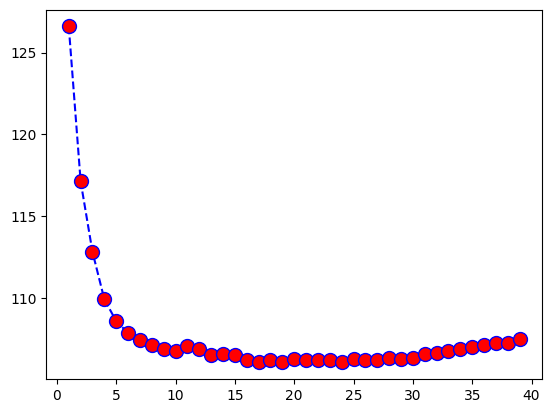

In [56]:
#verificando joelho
error_rate = []

# Levará algum tempo
for i in range(1,40):

    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_treino_final, y_treino_final)
    pred_i = knn.predict(x_teste_final)
    error_rate.append(metrics.mean_absolute_error(y_teste_final, pred_i))


plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.show()

Novamente sem ganhos usando KNN

In [57]:
FALTA SVM, GRADIENTE BOOSTING, REDES NEURAIS

SyntaxError: invalid syntax (<ipython-input-57-5b46e00e6b9f>, line 1)